<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-lineal/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import keras

# Teoria 

Es un método para predecir una variable objetivo ajustando la mejor relación lineal entre la variable independiente (predictor) y la dependendiente (target) $$ \hat{y} = mx + b$$

- $\hat{y}$ es el valor predicho.
- $x$ es el valor de la característica.
- $m$ y $b$ son la pendiente y el termino de sesgo respectivamente. Estos son los parametros del modelo que se deben ajustar para obtener la mejor aproximación. Usualmente se denotan con un vector de la siguiente manera:
$$\theta = \left [ \theta _{0}, \theta _{1}, ..., \theta _{p} \right]$$ donde $p$ denota el número de características o variables independientes del modelo.



# Ilustración

# ¿Cómo encontrar la mejor representación?

Entrenar a un modelo significa establecer los parametetros del modelo tal que este se ajuste de la mejor manera posible al conjunto de entrenamiento. Para este proposito se necesita establecer una medida que indique que tan bien o mal el modelo se está ajustando a estos. Esto se denomina Función de costo.

$$L(\mathbf{w},b) = \frac{1}{n}\sum_{i=1}^{n}\left (\hat{y}^{i} - y^{i}  \right )^{2}$$

se debe determinar  los valores de $w$ y $b$ que optimizan esta función.

Para abordar este problema de optimización se pueden utilizar los siguientes metodos:
- Solución análitíca
- Descenso del gradiente y variantes



In [ ]:
print('hi')

# Gradiente Descendente

# Stochastic Gradient Descent

# Implementación Keras

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import keras

def funcion3_RLineal(X, Y, dim = 1, num_ite = 50):
  inputs = Input(shape=(dim,))
  preds = Dense(1,activation='linear')(inputs)
  model = Model(inputs=inputs,outputs=preds)
  sgd=keras.optimizers.SGD(lr = 0.001)
  model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
  model.fit(X,Y, batch_size=1, epochs=num_ite, shuffle=False)
  return  model.get_weights()

Explicación relacionada a la implementación

# Observación ajuste de parametros -- Helper

# Implementación Pytorch

1) Design Model
2)Construct Loss and optimizer
3)Training Loop: Forward pass, backward pass, update weights


In [4]:
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1) ##reshape tensor

n_samples, n_features = X.shape

In [6]:
input_size = n_features
output_size = 1
model = nn.Linear(in_features = input_size, out_features = output_size )

In [7]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params= model.parameters(),lr = learning_rate)

In [10]:
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #backward
  loss.backward()

  ##update
  optimizer.step()

  optimizer.zero_grad() ## clean gradients to next iteration

  if(epoch+1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 10, loss = 339.8741
epoch: 20, loss = 337.9137
epoch: 30, loss = 336.4799
epoch: 40, loss = 335.4309
epoch: 50, loss = 334.6634
epoch: 60, loss = 334.1019
epoch: 70, loss = 333.6909
epoch: 80, loss = 333.3901
epoch: 90, loss = 333.1698
epoch: 100, loss = 333.0086
epoch: 110, loss = 332.8906
epoch: 120, loss = 332.8041
epoch: 130, loss = 332.7408
epoch: 140, loss = 332.6945
epoch: 150, loss = 332.6605
epoch: 160, loss = 332.6356
epoch: 170, loss = 332.6175
epoch: 180, loss = 332.6041
epoch: 190, loss = 332.5943
epoch: 200, loss = 332.5872
epoch: 210, loss = 332.5819
epoch: 220, loss = 332.5781
epoch: 230, loss = 332.5753
epoch: 240, loss = 332.5732
epoch: 250, loss = 332.5717
epoch: 260, loss = 332.5706
epoch: 270, loss = 332.5698
epoch: 280, loss = 332.5692
epoch: 290, loss = 332.5688
epoch: 300, loss = 332.5685
epoch: 310, loss = 332.5682
epoch: 320, loss = 332.5680
epoch: 330, loss = 332.5679
epoch: 340, loss = 332.5678
epoch: 350, loss = 332.5677
epoch: 360, loss = 332.5677
e

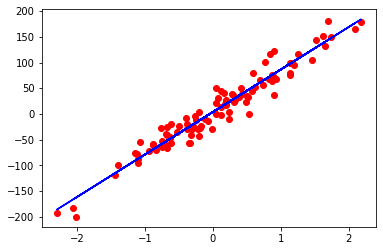

In [11]:
#plot
predicted = model(X).detach().numpy() # detach --gradient argument set to false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Explicación relacionada a la implementación

# Observación de ajuste de parametros -- Helper